Давыдов ПИм-231 лаба 11

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

(1) загрузите данные из прилагаемого файла (это двумерная выборка, целевая переменная на которой принимает значения 1 или -1).

In [ ]:
data = pd.read_csv("logistic.csv", header=None, names=["target", "feature1", "feature2"])
data.head()

,target,feature1,feature2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750


(2) Как наблюдения распределились по классам? (сколько в каждом классе?). Для ответа используйте метод value_counts().

In [ ]:
class_distribution = data["target"].value_counts()
print(class_distribution)


 1    105
-1    100
Name: target, dtype: int64


(3) Отобразите точками на плоскости признаки, различая классы цветом. Уберите данные, которые не попали в диапазон значений от -5 до 5 (будем считать их выбросами).

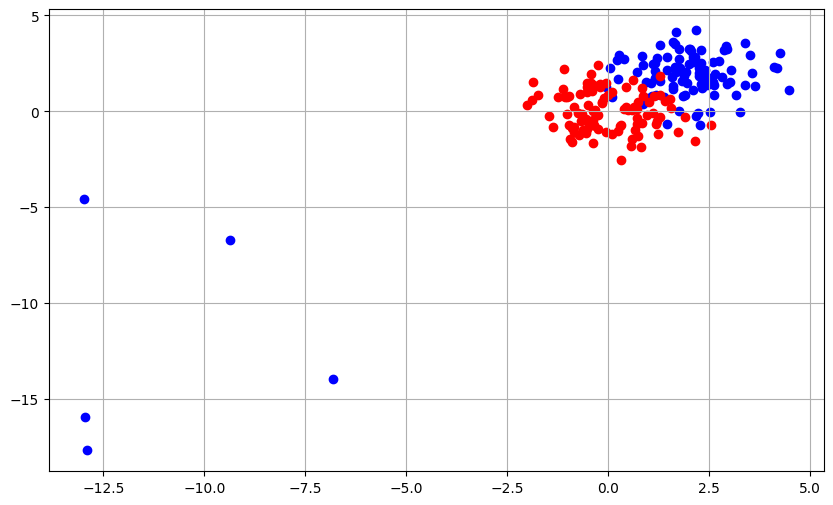

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data[data["target"] == 1]["feature1"], data[data["target"] == 1]["feature2"], c='b', label="Class 1")
plt.scatter(data[data["target"] == -1]["feature1"], data[data["target"] == -1]["feature2"], c='r', label="Class -1")
plt.grid(True)

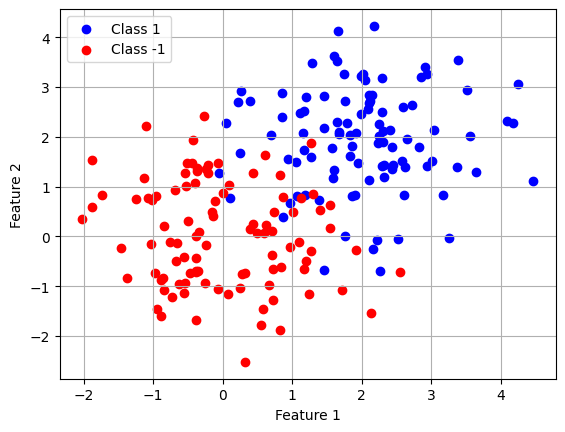

In [ ]:
# Уберем данные, которые не попадают в диапазон значений от -5 до 5
data = data[(data["feature1"] >= -5) & (data["feature1"] <= 5) & (data["feature2"] >= -5) & (data["feature2"] <= 5)]
plt.scatter(data[data["target"] == 1]["feature1"], data[data["target"] == 1]["feature2"], c='b', label="Class 1")
plt.scatter(data[data["target"] == -1]["feature1"], data[data["target"] == -1]["feature2"], c='r', label="Class -1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

(4) Разделите данные на признаки и ответы.

In [ ]:
X = data[["feature1", "feature2"]]  # Признаки
y = data["target"]  # Целевой столбец

(5) Обучите модель логистической регрессии (LogisticRegression или LogisticRegression_CV, дайте описание гиперпараметров модели).

In [ ]:
model = LogisticRegression() # Решил оставить все параметры по умолчанию
model.fit(X, y)

LogisticRegression()

(6) Отобразите на ранее полученном рисунке гиперплоскость, получив необходимые коэффициенты из построенной модели.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


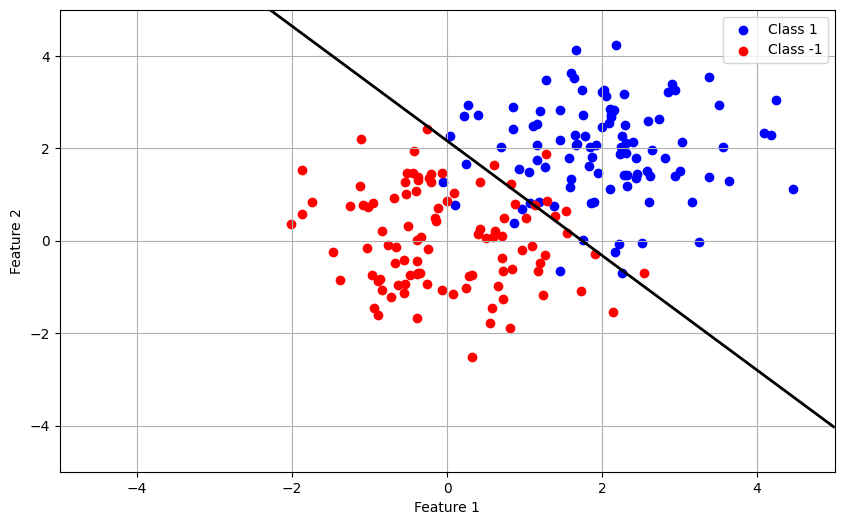

Coef: [[2.16992485 1.74858497]], intercept: [-3.77937221].


In [ ]:
coef = model.coef_
intercept = model.intercept_
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Это гиперплоскость, вернее готовая функция для нее
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.scatter(data[data["target"] == 1]["feature1"], data[data["target"] == 1]["feature2"], c='b', label="Class 1")
plt.scatter(data[data["target"] == -1]["feature1"], data[data["target"] == -1]["feature2"], c='r', label="Class -1")
plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
print(f"Coef: {coef}, intercept: {intercept}.")

(7) получите матрицу несоответствий / ошибок (confusion matrix). Дайте пояснения.

In [ ]:
y_pred = model.predict(X)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[92  8]
 [ 8 92]]


Модель угадала 92 раза с Y = -1 и также 92 раза с Y = 1.

(8) Получите оценки качества классификации (на обучающей выборке): доля правильных ответов, точность, полнота, F-меру, AUC. Дайте пояснения.

In [ ]:
# Доля правильных ответов (Accuracy)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Точность (Precision)
precision = precision_score(y, y_pred)
print("Precision:", precision)

# Полнота (Recall)
recall = recall_score(y, y_pred)
print("Recall:", recall)

# F-мера (F1 Score)
f1 = f1_score(y, y_pred)
print("F-мера:", f1)

# Площадь под ROC-кривой (AUC)
y_proba = model.predict_proba(X)[:, 1]  # Получаем вероятности класса 1
roc_auc = roc_auc_score(y, y_proba)
print("AUC:", roc_auc)

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F-мера: 0.92
AUC: 0.9839


Классификация прошла с высокой точностью:

**Accuracy (доля правильных ответов)**: 92% из всех предсказаний были верными, что является хорошим показателем.

**Precision (точность)**: 92% объектов, которые модель предсказала как положительные (класс 1), действительно принадлежат к этому классу. Это говорит о том, что модель редко допускает ложно-положительные ошибки.

**Recall (полнота)**: Модель смогла обнаружить 92% объектов, которые действительно принадлежат к положительному классу (класс 1). Это показывает, что модель хорошо справляется с обнаружением объектов класса 1.

**F-мера**: Этот показатель объединяет точность и полноту. F1-мера 0.92 также указывает на хорошее качество модели.

**AUC (Area Under the Curve)**: Площадь под ROC-кривой составляет 0.9839, что близко к 1. Это также говорит о высоком качестве модели.

(9) В окрестности гиперплоскости задайте некоторое количество случайных точек (отобразите их на рисунке новым цветом). Определите при помощи построенной модели принадлежность классу.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


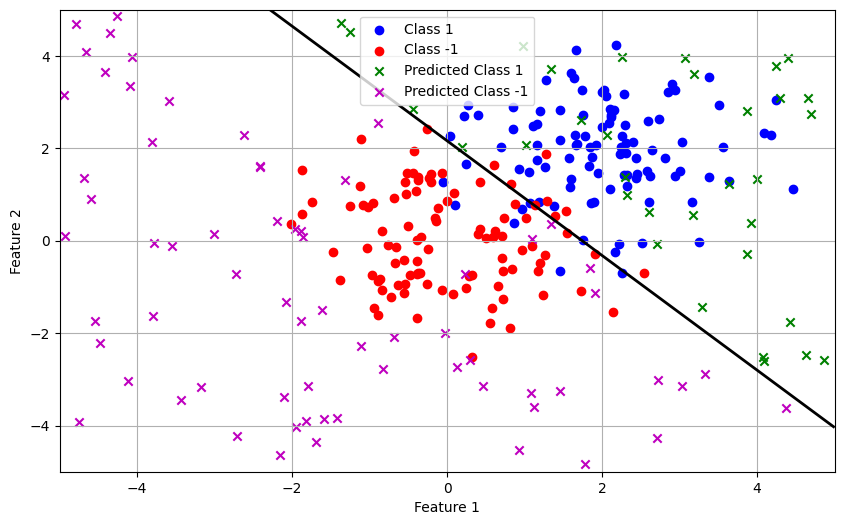

In [ ]:
# Создаем случайные точки
np.random.seed(42)
random_points = np.random.rand(100, 2) * 10 - 5

# Определяем их принадлежность классу
predicted_class = model.predict(random_points)

# Отобразим точки и их классы
plt.figure(figsize=(10, 6))
plt.scatter(data[data["target"] == 1]["feature1"], data[data["target"] == 1]["feature2"], c='b', label="Class 1")
plt.scatter(data[data["target"] == -1]["feature1"], data[data["target"] == -1]["feature2"], c='r', label="Class -1")
plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)
plt.scatter(random_points[predicted_class == 1][:, 0], random_points[predicted_class == 1][:, 1], c='g', marker='x', label="Predicted Class 1")
plt.scatter(random_points[predicted_class == -1][:, 0], random_points[predicted_class == -1][:, 1], c='m', marker='x', label="Predicted Class -1")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
